In [46]:
%run graph_operator.py

In [1]:
if __name__ == "__main__":
    from graph_operator import *
    path = nx.path_graph(1000)
    p1 = GraphOperator(path, "combinatorial laplacian")

/Users/zhaowanhe/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
p1

Graph, cached = True
path_graph(1000)
combinatorial laplacian

In [3]:
p1.laplacian

<1000x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 2998 stored elements in Compressed Sparse Row format>

In [4]:
p1.matrix_type

'combinatorial laplacian'

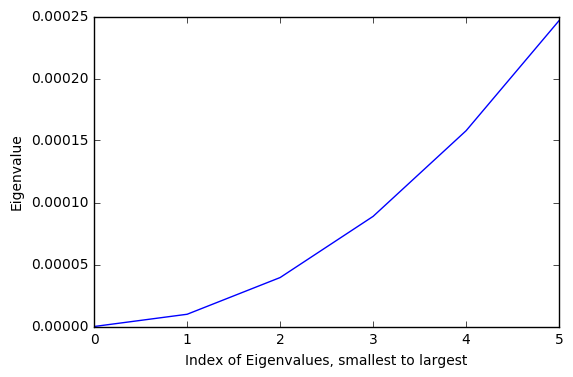

In [5]:
p1.plot_eigenvals()
plt.show()

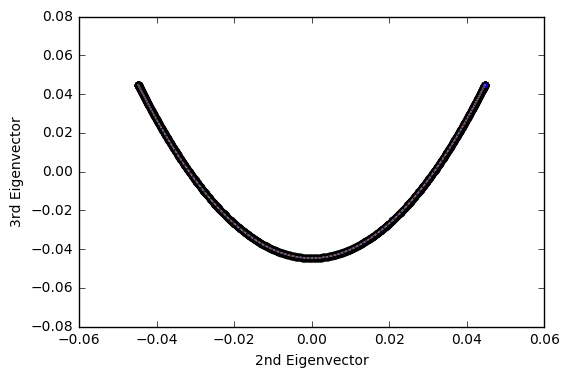

In [59]:
p1.plot_eigenvectors()
plt.show()

In [7]:
lob = nx.random_lobster(5, 0.6, 0.9, seed = 37)
g1 = GraphOperator(lob, "adjacency")
g2 = GraphOperator(lob, "combinatorial laplacian")
g3 = GraphOperator(lob, "normalized laplacian")

In [8]:
g1

Graph, cached = True
random_lobster(5,0.6,0.9)
adjacency

In [64]:
g2.eigvecs[:,1]

array([-0.35625041, -0.25124631, -0.12528084,  0.01113677,  0.14427183,
        0.23488306,  0.25626298, -0.43153269, -0.47081237,  0.01349017,
        0.0147181 ,  0.17475913,  0.19066634,  0.28451818,  0.31041606])

In [65]:
[g2.eigvecs[:,1][i] for i in range(len(g2.eigvecs[:,1])) if g2.eigvecs[:,1][i] >=0]

[0.011136767986363514,
 0.14427183250285153,
 0.23488306155503588,
 0.25626297573693252,
 0.013490172231596048,
 0.014718096981473852,
 0.17475912859229739,
 0.19066634279101405,
 0.28451817964977727,
 0.31041606357478008]

In [66]:
[g2.eigvecs[:,1][i] for i in range(len(g2.eigvecs[:,1])) if g2.eigvecs[:,1][i] < 0]

[-0.35625041318314732,
 -0.25124631299615491,
 -0.12528083672692214,
 -0.43153268859534372,
 -0.47081237010055843]

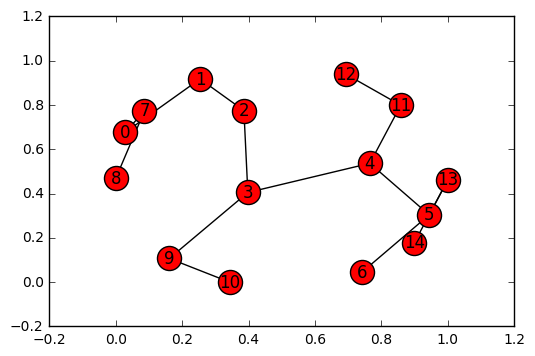

In [14]:
(A, C) = g2.partition()
g2.draw_graphWithLabel()
plt.show()

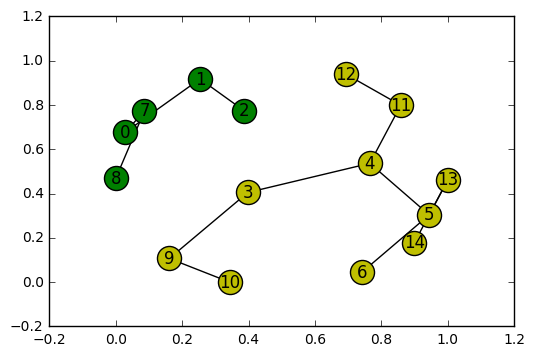

In [15]:
g2.draw_partitionGraph(A, C)
plt.show()